In [1]:
import pink
import tools
import numpy as np

print(pink.__version__)

images = np.zeros((1,4,4,2))
images[0,1:3,1:3,0] = 1
images[0,0,0,0] = 0.5
images[0,3,0,0] = 0.5
images[0,0,3,0] = 0.5
images[0,3,3,0] = 0.5
images[0,0,0,1] = 0.5
images[0,3,0,1] = 0.5
images[0,0,3,1] = 0.5
images[0,3,3,1] = 0.5

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

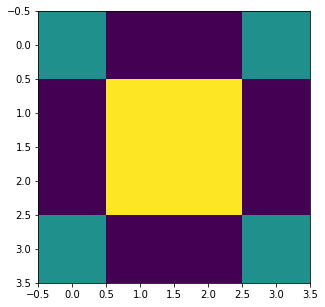

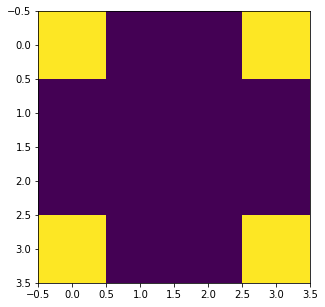

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.imshow(images[0,:,:,0])

plt.figure(figsize=(5,5))
plt.imshow(images[0,:,:,1])

In [3]:
import math

som_dim = 2
neuron_dim = images.shape[1]
euclid_dim = images.shape[1]
#neuron_dim = int(images.shape[1] / math.sqrt(2.0) * 2.0)
#euclid_dim = int(images.shape[1] * math.sqrt(2.0) / 2.0)
number_of_channnels = images.shape[3]

print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)
print("number_of_channnels = ", number_of_channnels)

#np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim, number_of_channnels).astype(np.float32)
np_som = np.zeros((som_dim, som_dim, neuron_dim, neuron_dim, number_of_channnels)).astype(np.float32)
som = pink.SOM(np_som, neuron_layout="cartesian-3d")

trainer = pink.Trainer(som,
                       number_of_rotations=1,
                       use_flip=False,
                       euclidean_distance_dim=euclid_dim,
                       use_gpu=False,
                       verbosity=1)

neuron_dim =  4
euclid_dim =  4
number_of_channnels =  2


In [4]:
from tqdm.notebook import trange, tqdm

print(images[0])

for j in trange(1):
    for i in range(images.shape[0]):
        trainer(pink.Data(images[i], layout="cartesian-3d"))

[[[0.5 0.5]
  [0.  0. ]
  [0.  0. ]
  [0.5 0.5]]

 [[0.  0. ]
  [1.  0. ]
  [1.  0. ]
  [0.  0. ]]

 [[0.  0. ]
  [1.  0. ]
  [1.  0. ]
  [0.  0. ]]

 [[0.5 0.5]
  [0.  0. ]
  [0.  0. ]
  [0.5 0.5]]]


In [5]:
trainer.update_som()
np_som = np.array(som, copy=True)
print(np_som.shape)

(2, 2, 4, 4, 2)


(2, 4, 2, 4)


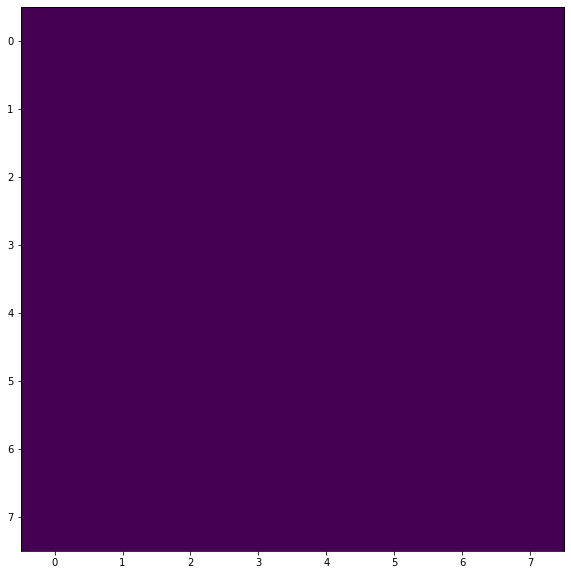

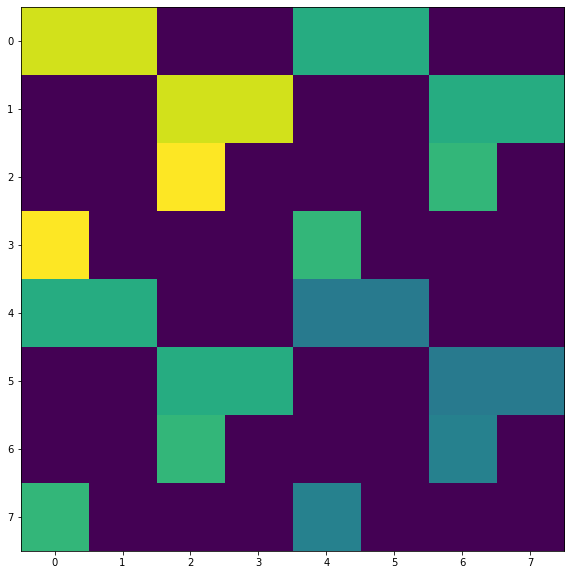

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

print(np_som[:,:,:,:,0].swapaxes(1, 2).shape)

plt.figure(figsize=(10,10))
plt.imshow(np_som[:,:,:,:,0].swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)

plt.figure(figsize=(10,10))
plt.imshow(np_som[:,:,:,:,1].swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)